In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

This notebook will explore the relation between the noise of dataset and computational time of persistent homology.

In [42]:
df1 = pd.read_csv('noisy_circle_std_new.csv')
# sum over several columns and insert the into dataframe
df1.insert(loc=10, column='reb_total', value=(df1['setup2'] + df1['construct2'] + df1['reduce2']))
df1.insert(loc=11, column='upd_total', value=(df1['setup2'] + df1['construct2'] + df1['update']))
df1.insert(loc=12, column='nnz_reb', value=(df1['nnz_reb_R'] + df1['nnz_reb_U']))
df1.insert(loc=13, column='nnz_upd', value=(df1['nnz_upd_R'] + df1['nnz_upd_U']))

# only look at rows with dimension at 2 and number of points == 20 and std == 0.001
a = df1.loc[(df1['dimension'] == 2) & (df1['n_points'] == 100)]
b = a.groupby(['std']).mean()[['reb_total', 'nnz_reb','upd_total', 'nnz_upd']] # look at different std's effect
b

,reb_total,nnz_reb,upd_total,nnz_upd
std,,,,
0.001000,0.422208,2662605.90,0.196476,2656066.15
0.001425,0.440294,2752775.85,0.213604,2749245.40
0.002031,0.421555,2683044.35,0.216140,2698855.90
0.002894,0.391789,2499745.75,0.201011,2509138.10
0.004125,0.409762,2569306.00,0.215259,2550999.40
0.005878,0.379335,2415268.95,0.213733,2457913.55
0.008377,0.388302,2400792.50,0.217474,2427152.85
0.011938,0.373665,2366397.45,0.214630,2306425.70
0.017013,0.358289,2249552.15,0.218621,2239957.10


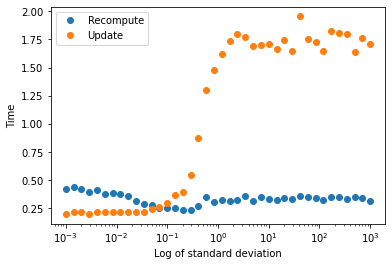

In [43]:
std = np.array(b.index)
plt.semilogx(std, b['reb_total'],'o' ,label = 'Recompute')
plt.semilogx(std, b['upd_total'],'o' ,label = 'Update')
plt.xlabel('Log of standard deviation')
plt.ylabel('Time')
plt.legend()
plt.savefig('Time_vs_log_std.svg', format='svg', dpi=1200)

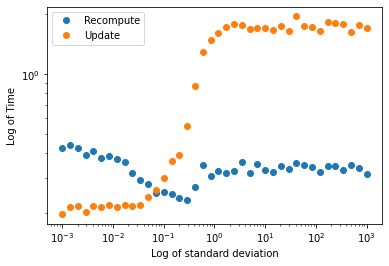

In [44]:
std = np.array(b.index)
plt.loglog(std, b['reb_total'],'o' ,label = 'Recompute')
plt.loglog(std, b['upd_total'],'o' ,label = 'Update')
plt.xlabel('Log of standard deviation')
plt.ylabel('Log of Time')
plt.legend()
plt.savefig('Log_Time_vs_log_std.svg', format='svg', dpi=1200)

In [45]:
# calculate correlation
from scipy.stats import spearmanr
def correlation(x,y):
    cor, _ = spearmanr(x,y)
    return cor

c1 = correlation(b['reb_total'], b['nnz_reb'])
c2 = correlation(b['upd_total'], b['nnz_upd'])
c1, c2

(0.9493433395872422, 0.7966228893058162)

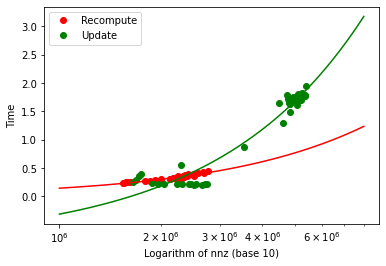

In [51]:
std = np.array(a.index)
plt.semilogx(b['nnz_reb'], b['reb_total'], 'ro', label = 'Recompute')
plt.semilogx(b['nnz_upd'], b['upd_total'], 'go',label = 'Update')
plt.xlabel('Logarithm of nnz (base 10)')
plt.ylabel('Time')

xline = np.linspace(1e6, 8e6, 100)
x, y = b['nnz_reb'], b['reb_total']
m, c = np.polyfit(x,y, 1)
plt.plot(xline, m*xline + c, 'r')

x, y = b['nnz_upd'], b['upd_total']
m, c = np.polyfit(x,y, 1)
plt.plot(xline, m*xline + c, 'g')

plt.legend()
plt.savefig('Time_vs_log_nnz.svg', format='svg', dpi=1200)

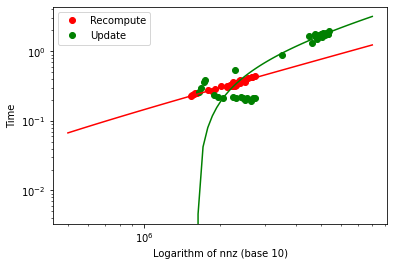

In [47]:
std = np.array(a.index)
plt.loglog(b['nnz_reb'], b['reb_total'], 'ro', label = 'Recompute')
plt.loglog(b['nnz_upd'], b['upd_total'], 'go',label = 'Update')
plt.xlabel('Logarithm of nnz (base 10)')
plt.ylabel('Time')

xline = np.linspace(5e5, 8e6, 100)
x, y = b['nnz_reb'], b['reb_total']
m, c = np.polyfit(x,y, 1)
plt.plot(xline, m*xline + c, 'r')

x, y = b['nnz_upd'], b['upd_total']
m, c = np.polyfit(x,y, 1)
plt.plot(xline, m*xline + c, 'g')

plt.legend()
plt.savefig('Time_vs_log_nnz.svg', format='svg', dpi=1200)